In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore

In [2]:
# Load the dataset
df = pd.read_csv("Cohen Data.csv")

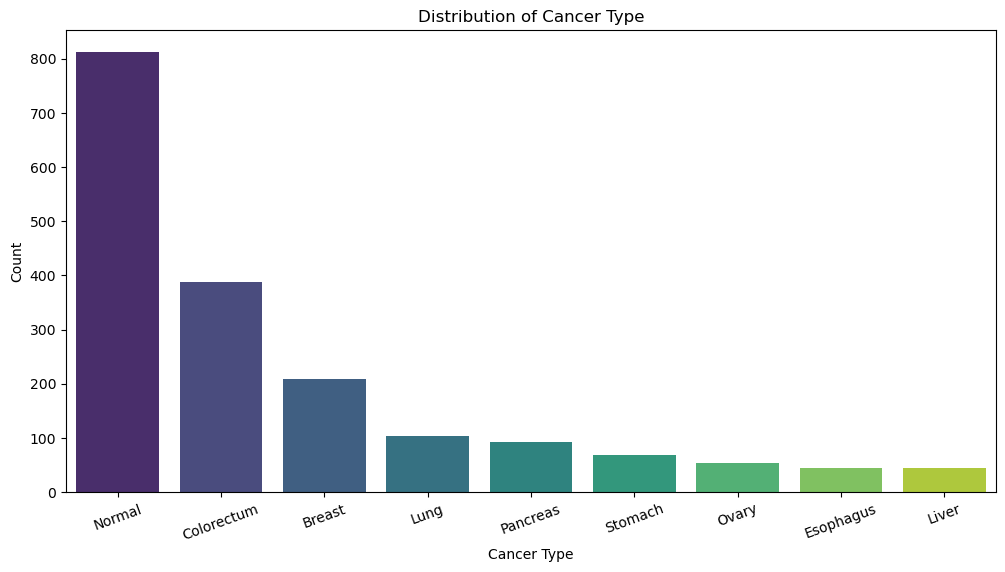

In [4]:
# Count occurrences of each class
df_counts = df["class"].value_counts().reset_index()
df_counts.columns = ["class", "Count"]

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_counts, x="class", y="Count", palette="viridis")

# Rotate x-axis labels for readability
plt.xticks(rotation=20)

# Add titles and labels
plt.title("Distribution of Cancer Type")
plt.xlabel("Cancer Type")
plt.ylabel("Count")

# Show the plot
plt.show()


In [5]:
# Separate features and target
X = df.drop(columns=['class'])
y = df['class']

# Label encoding for the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [6]:
from collections import Counter

# Display the column names in the DataFrame to verify the correct target column name
print("Available columns:", df.columns)

# Define the correct target column name
target_column = "class"  # Change this if it's different in your dataset

# Check if the target column exists in the DataFrame
if target_column in df.columns:
    # Split the data into features (X) and target (y)
    X = df.drop(columns=[target_column])  
    y = df[target_column]

    # Print the class distribution before any processing
    print("Original class distribution:", Counter(y))
else:
    print(f"Error: Column '{target_column}' not found in DataFrame!")


Available columns: Index(['AFP (pg/ml)', 'Angiopoietin-2 (pg/ml)', 'AXL (pg/ml)', 'CA-125 (U/ml)',
       'CA 15-3 (U/ml)', 'CA19-9 (U/ml)', 'CD44 (ng/ml)', 'CEA (pg/ml)',
       'CYFRA 21-1 (pg/ml)', 'DKK1 (ng/ml)', 'Endoglin (pg/ml)',
       'FGF2 (pg/ml)', 'Follistatin (pg/ml)', 'Galectin-3 (ng/ml)',
       'G-CSF (pg/ml)', 'GDF15 (ng/ml)', 'HE4 (pg/ml)', 'HGF (pg/ml)',
       'IL-6 (pg/ml)', 'IL-8 (pg/ml)', 'Kallikrein-6 (pg/ml)',
       'Leptin (pg/ml)', 'Mesothelin (ng/ml)', 'Midkine (pg/ml)',
       'Myeloperoxidase (ng/ml)', 'NSE (ng/ml)', 'OPG (ng/ml)', 'OPN (pg/ml)',
       'PAR (pg/ml)', 'Prolactin (pg/ml)', 'sEGFR (pg/ml)', 'sFas (pg/ml)',
       'SHBG (nM)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'sPECAM-1 (pg/ml)',
       'TGFa (pg/ml)', 'Thrombospondin-2 (pg/ml)', 'TIMP-1 (pg/ml)',
       'TIMP-2 (pg/ml)', 'Omega Score', 'Age', 'ethonic', 'gender', 'class'],
      dtype='object')
Original class distribution: Counter({'Normal': 812, 'Colorectum': 388, 'Breast': 209, 'Lung': 104, 

In [8]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y_encoded)

print("Class distribution after SMOTE:", Counter(y_smote))

Class distribution after SMOTE: Counter({1: 812, 4: 812, 0: 812, 7: 812, 6: 812, 2: 812, 3: 812, 8: 812, 5: 812})


In [10]:
le = LabelEncoder()

# Recover column names
if isinstance(X, pd.DataFrame):
    X_columns = X.columns
else:
    X_columns = [f"feature_{i}" for i in range(X_smote.shape[1])]

# Decode target labels to original classes
y_decoded = le.inverse_transform(y_smote)

# Convert to DataFrames
X_df = pd.DataFrame(X_smote, columns=X_columns)
y_df = pd.DataFrame(y_decoded, columns=["target"])

# Combine and save
df_smote = pd.concat([X_df, y_df], axis=1)
df_smote.to_csv("New_oversampled_Cohen_data.csv", index=False)

print("Oversampled and decoded data saved to 'oversampled_data.csv'")

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [13]:
data = pd.read_csv("New_oversampled_Cohen_data.csv")

In [14]:
data

,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),...,sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Omega Score,Age,ethonic,gender,target
0,1583.450000,5598.500000,3621.040000,5.090000,19.080000,16.452000,9.810000,540.100000,1938.654000,0.780000,...,9368.530000,16.086000,21863.740000,56428.710000,39498.820000,2.960000,60,1,1,1
1,715.308000,20936.350000,2772.960000,7.270000,10.040000,40.910000,27.570000,5902.400000,1938.654000,0.770000,...,6224.550000,16.086000,29669.660000,73940.490000,41277.090000,2.450000,59,1,0,1
2,4365.530000,2350.930000,4120.770000,4.854000,16.960000,16.452000,14.590000,973.800000,1976.940000,0.900000,...,4046.480000,179.030000,6020.470000,22797.280000,28440.600000,1.220000,69,1,0,1
3,715.308000,1604.340000,2029.960000,5.390000,8.310000,16.452000,7.780000,2027.500000,1938.654000,0.640000,...,6121.930000,16.086000,4331.020000,20441.190000,25896.730000,1.640000,70,1,0,1
4,801.300000,2087.570000,2069.170000,4.854000,11.730000,16.452000,12.210000,614.500000,1938.654000,0.780000,...,6982.320000,16.086000,2311.910000,56288.510000,49425.200000,1.330000,43,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,1639.100868,2767.123838,2940.479065,9.286111,15.398163,18.709138,22.196797,668.879757,1988.196000,1.027672,...,5722.701875,16.488000,1782.530453,67135.306695,41743.601964,1.186031,74,1,0,8
7304,3219.924716,2932.951465,1421.274701,24.209679,7.771231,2092.308386,10.633706,5908.264970,6328.641610,1.070000,...,4669.259304,95.985579,6993.666891,144491.222829,22983.940285,1.579311,47,3,0,8
7305,1160.912383,2950.630072,2104.521371,10.093889,26.452091,141.157600,14.943873,14937.267247,2359.716585,0.732292,...,4721.286854,16.488000,1387.241270,70122.278538,60607.630627,15.221332,75,1,1,8
7306,978.907984,1111.466137,447.829154,18.902076,15.725460,30.004415,12.108692,1742.777726,2983.321542,0.621600,...,3819.483000,16.165976,2010.488769,33752.188611,30598.291272,1.191253,39,2,0,8


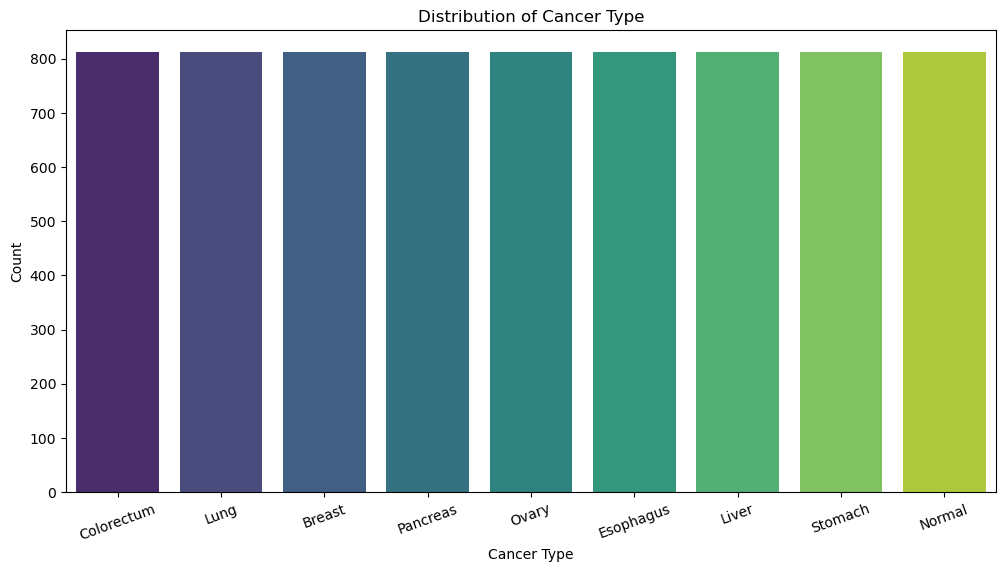

In [8]:
# Count occurrences of each class
data_counts = data["class"].value_counts().reset_index()
data_counts.columns = ["class", "Count"]

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=data_counts, x="class", y="Count", palette="viridis")

# Rotate x-axis labels for readability
plt.xticks(rotation=20)

# Add titles and labels
plt.title("Distribution of Cancer Type")
plt.xlabel("Cancer Type")
plt.ylabel("Count")

# Show the plot
plt.show()


In [9]:
print(data.isnull().sum())

AFP (pg/ml)                    0
Angiopoietin-2 (pg/ml)         0
AXL (pg/ml)                    0
CA-125 (U/ml)                  0
CA 15-3 (U/ml)                 0
CA19-9 (U/ml)                  0
CD44 (ng/ml)                   0
CEA (pg/ml)                    0
CYFRA 21-1 (pg/ml)             0
DKK1 (ng/ml)                   0
Endoglin (pg/ml)               0
FGF2 (pg/ml)                   0
Follistatin (pg/ml)            0
Galectin-3 (ng/ml)             0
G-CSF (pg/ml)                  0
GDF15 (ng/ml)                  0
HE4 (pg/ml)                    0
HGF (pg/ml)                    0
IL-6 (pg/ml)                   0
IL-8 (pg/ml)                   0
Kallikrein-6 (pg/ml)           0
Leptin (pg/ml)                 0
Mesothelin (ng/ml)             0
Midkine (pg/ml)                0
Myeloperoxidase (ng/ml)        0
NSE (ng/ml)                    0
OPG (ng/ml)                    0
OPN (pg/ml)                    0
PAR (pg/ml)                    0
Prolactin (pg/ml)              0
sEGFR (pg/

In [10]:
data.describe()

,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),...,SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Omega Score,Age,gender
count,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7.308000e+03,7308.000000,...,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000
mean,22990.820757,2189.263490,2330.885501,57.036091,31.745973,117.970108,18.939445,5136.226807,4.768880e+03,1.044644,...,67.823041,5631.014189,5782.282501,29.712949,7060.284969,87532.381136,41890.033171,8.088269,60.737548,0.433361
std,104278.129671,1462.278260,1386.671761,238.276811,80.424425,701.576553,10.023823,25347.204864,2.494991e+04,0.413367,...,47.100317,3535.822780,1981.423737,236.533038,11620.425214,54692.210800,12784.819981,24.232936,12.211340,0.495573
min,706.158000,38.391000,0.000000,4.608000,1.320000,14.214000,0.000000,426.440000,1.816458e+03,0.350000,...,1.500000,0.000000,0.000000,15.258000,0.000000,976.550000,15026.320000,0.000000,17.000000,0.000000
25%,913.980000,1268.853253,1456.936384,4.962000,9.446649,16.452000,12.494983,785.274065,1.970916e+03,0.787205,...,35.975446,3962.823285,4429.001432,16.459722,2026.973309,51076.730000,32691.554591,0.910000,54.000000,0.000000
50%,1240.292816,1859.520109,2053.445375,5.900886,15.335507,17.490000,16.190722,1280.792539,2.187283e+03,0.950000,...,55.987683,4886.176554,5464.709129,16.554000,3109.880732,72275.829115,39471.793013,1.319303,62.000000,0.000000
75%,2604.051087,2714.410320,2816.393860,12.123546,23.539928,31.887879,22.516902,2300.552477,3.872105e+03,1.192439,...,85.522112,6182.832500,6744.904261,16.935514,7375.142046,105739.233060,48285.371645,3.580722,70.000000,1.000000
max,600608.892000,30001.791000,12247.310000,3600.024000,1177.446000,12491.472000,148.440000,337245.430000,1.475728e+06,5.970000,...,478.840000,150848.100000,20178.170000,12018.864000,157461.070000,569512.690000,105748.640000,333.230000,93.000000,1.000000


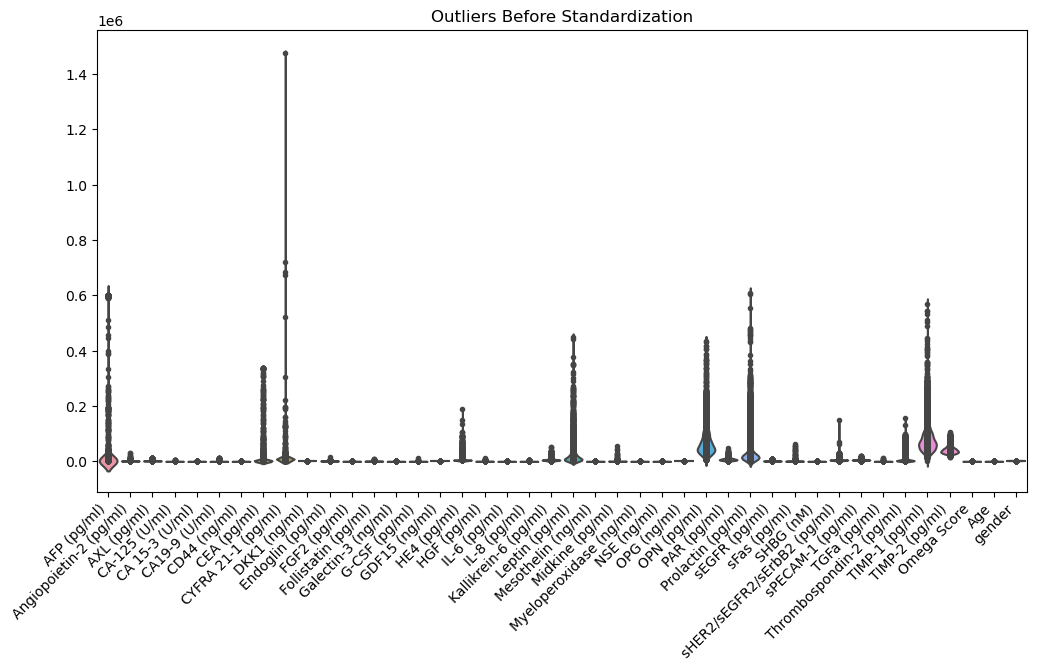

 Number of outliers before Standardization: 4768


In [11]:
class_column = data["class"]
data_without_class = data.drop(columns=["class"])

# Display outliers before standardization
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_without_class, inner="point", scale="width")
plt.xticks(rotation=45, ha="right")
plt.title("Outliers Before Standardization")
plt.show()

# Calculate the number of outliers before standardization
z_scores_before = np.abs(zscore(data_without_class))
outliers_before = (z_scores_before > 3).sum().sum()
print(f" Number of outliers before Standardization: {outliers_before}")


In [12]:
# Apply Standardization
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data_without_class), columns=data_without_class.columns)


In [13]:
data_standardized

,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),...,SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Omega Score,Age,gender
0,-0.205305,2.331615,0.930460,-0.218022,-0.157500,-0.144710,-0.910837,-0.181339,-0.113444,-0.640261,...,-0.270994,0.339705,1.810059,-0.057615,1.274004,-0.568743,-0.187048,-0.211638,-0.060403,1.143480
1,-0.213631,12.821342,0.318824,-0.208873,-0.269911,-0.109846,0.861063,0.030229,-0.113444,-0.664454,...,0.108222,-0.023064,0.223222,-0.057615,1.945791,-0.248533,-0.047946,-0.232686,-0.142299,-0.874523
2,-0.178624,0.110566,1.290866,-0.219013,-0.183862,-0.144710,-0.433940,-0.164228,-0.111909,-0.349941,...,2.249756,-0.546686,-0.876098,0.631317,-0.089488,-1.183707,-1.052057,-0.283446,0.676668,-0.874523
3,-0.213631,-0.400036,-0.217028,-0.216763,-0.291424,-0.144710,-1.113368,-0.122654,-0.113444,-0.978966,...,-0.814340,0.063635,0.171428,-0.057615,-0.234884,-1.226789,-1.251046,-0.266113,0.758564,-0.874523
4,-0.212806,-0.069549,-0.188749,-0.219013,-0.248896,-0.144710,-0.671391,-0.178404,-0.113444,-0.640261,...,0.217571,-0.051783,0.605685,-0.057615,-0.408651,-0.571306,0.589424,-0.278907,-1.452647,-0.874523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,-0.204771,0.395205,0.439639,-0.200411,-0.203283,-0.141492,0.324983,-0.176258,-0.111458,-0.041062,...,-0.218070,-0.500515,-0.030072,-0.055915,-0.454210,-0.372968,-0.011454,-0.284848,1.086151,-0.874523
7304,-0.189611,0.508617,-0.656012,-0.137775,-0.298123,2.814338,-0.828657,0.030461,0.062520,0.061344,...,0.506313,-0.495808,-0.561767,0.280203,-0.005733,1.041515,-1.478893,-0.268618,-1.125060,-0.874523
7305,-0.209357,0.520707,-0.163254,-0.197020,-0.065829,0.033053,-0.398635,0.386698,-0.096567,-0.755683,...,-0.619732,-0.144181,-0.535508,-0.055915,-0.488229,-0.318351,1.464149,0.294374,1.168048,1.143480
7306,-0.211103,-0.737118,-1.358061,-0.160052,-0.199213,-0.125391,-0.681499,-0.133888,-0.071571,-1.023482,...,-0.399832,-0.815794,-0.990668,-0.057277,-0.434592,-0.983392,-0.883275,-0.284633,-1.780233,-0.874523


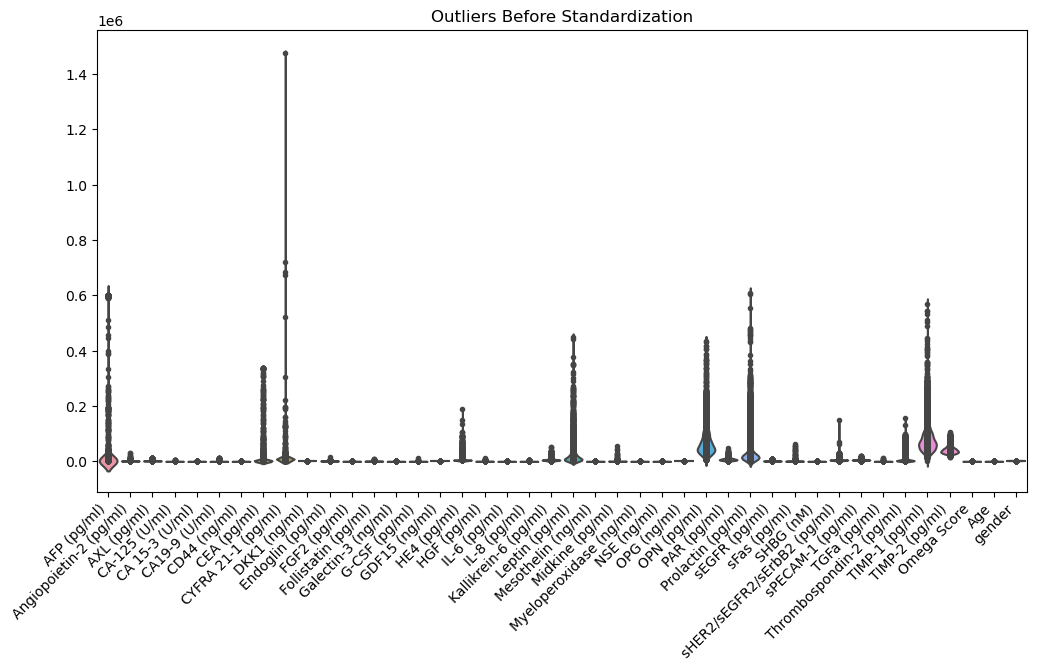

Number of outliers after standardization: 4768


In [14]:
# Visualizing outliers after standardization
plt.figure(figsize=(12, 6))
sns.violinplot(data=data_without_class, inner="point", scale="width")
plt.xticks(rotation=45, ha="right")
plt.title("Outliers Before Standardization")
plt.show()

# Calculate the number of outliers after standardization
z_scores_after = np.abs(zscore(data_standardized))
outliers_after = (z_scores_after > 3).sum().sum()
print(f"Number of outliers after standardization: {outliers_after}")

In [4]:
df= pd.read_csv("oversampled_Cohen_data.csv")

In [5]:
df

,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),DKK1 (ng/ml),...,sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),Omega Score,Age,ethonic,gender,target
0,1583.450000,5598.500000,3621.040000,5.090000,19.080000,16.452000,9.810000,540.100000,1938.654000,0.780000,...,9368.530000,16.086000,21863.740000,56428.710000,39498.820000,2.960000,60,1,1,1
1,715.308000,20936.350000,2772.960000,7.270000,10.040000,40.910000,27.570000,5902.400000,1938.654000,0.770000,...,6224.550000,16.086000,29669.660000,73940.490000,41277.090000,2.450000,59,1,0,1
2,4365.530000,2350.930000,4120.770000,4.854000,16.960000,16.452000,14.590000,973.800000,1976.940000,0.900000,...,4046.480000,179.030000,6020.470000,22797.280000,28440.600000,1.220000,69,1,0,1
3,715.308000,1604.340000,2029.960000,5.390000,8.310000,16.452000,7.780000,2027.500000,1938.654000,0.640000,...,6121.930000,16.086000,4331.020000,20441.190000,25896.730000,1.640000,70,1,0,1
4,801.300000,2087.570000,2069.170000,4.854000,11.730000,16.452000,12.210000,614.500000,1938.654000,0.780000,...,6982.320000,16.086000,2311.910000,56288.510000,49425.200000,1.330000,43,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,1639.100868,2767.123838,2940.479065,9.286111,15.398163,18.709138,22.196797,668.879757,1988.196000,1.027672,...,5722.701875,16.488000,1782.530453,67135.306695,41743.601964,1.186031,74,1,0,8
7304,3219.924716,2932.951465,1421.274701,24.209679,7.771231,2092.308386,10.633706,5908.264970,6328.641610,1.070000,...,4669.259304,95.985579,6993.666891,144491.222829,22983.940285,1.579311,47,3,0,8
7305,1160.912383,2950.630072,2104.521371,10.093889,26.452091,141.157600,14.943873,14937.267247,2359.716585,0.732292,...,4721.286854,16.488000,1387.241270,70122.278538,60607.630627,15.221332,75,1,1,8
7306,978.907984,1111.466137,447.829154,18.902076,15.725460,30.004415,12.108692,1742.777726,2983.321542,0.621600,...,3819.483000,16.165976,2010.488769,33752.188611,30598.291272,1.191253,39,2,0,8
